In [3]:
library(Seurat)
library(tidyverse)
library(Matrix)
library(scales)
library(cowplot)
library(RCurl)

Attaching SeuratObject

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘RCurl’


The following object is masked 

In [199]:
# read in data, including all complexity
path <- "SeuratOut/integrated-allcomplexity-clustered.rds"
data <- readRDS(path)

In [3]:
head(data)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_CMO,nFeature_CMO,log10GenesPerUMI,mitoRatio,nCount_SCT,nFeature_SCT,integrated_snn_res.0.5,seurat_clusters
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>
AAACCCACAAGTGATA-1_1,Age3_SV_20C1,3940,1628,5291,10,0.8934306,0.037525355,3891,1599,5,5
AAACGAAGTAGGATAT-1_1,Age3_SV_20C1,1607,738,532,10,0.8946939,0.020522388,2547,734,13,13
AAACGCTCAACCGCCA-1_1,Age3_SV_20C1,3621,1620,834,10,0.9019357,0.017112890,3617,1595,5,5
AAAGGTAGTTGCCGAC-1_1,Age3_SV_20C1,2484,926,476,10,0.8739647,0.026950925,3030,921,13,13
AAAGTCCCACTGTGAT-1_1,Age3_SV_20C1,68700,4004,2611,10,0.7448281,0.007656255,8869,1354,4,4
AAATGGAAGTATCTGC-1_1,Age3_SV_20C1,5678,1466,1885,10,0.8434206,0.015143511,4708,1446,15,15
AACAAGATCCCTCAAC-1_1,Age3_SV_20C1,878,470,4398,10,0.9077978,0.027334852,2090,513,5,5
AACAGGGTCCTTCTTC-1_1,Age3_SV_20C1,2322,839,578,10,0.8687571,0.004304778,2944,826,0,0
AACCAACCATATACCG-1_1,Age3_SV_20C1,16405,3580,3733,10,0.8431796,0.014994514,7446,2985,1,1


Warning message:
“The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality.”


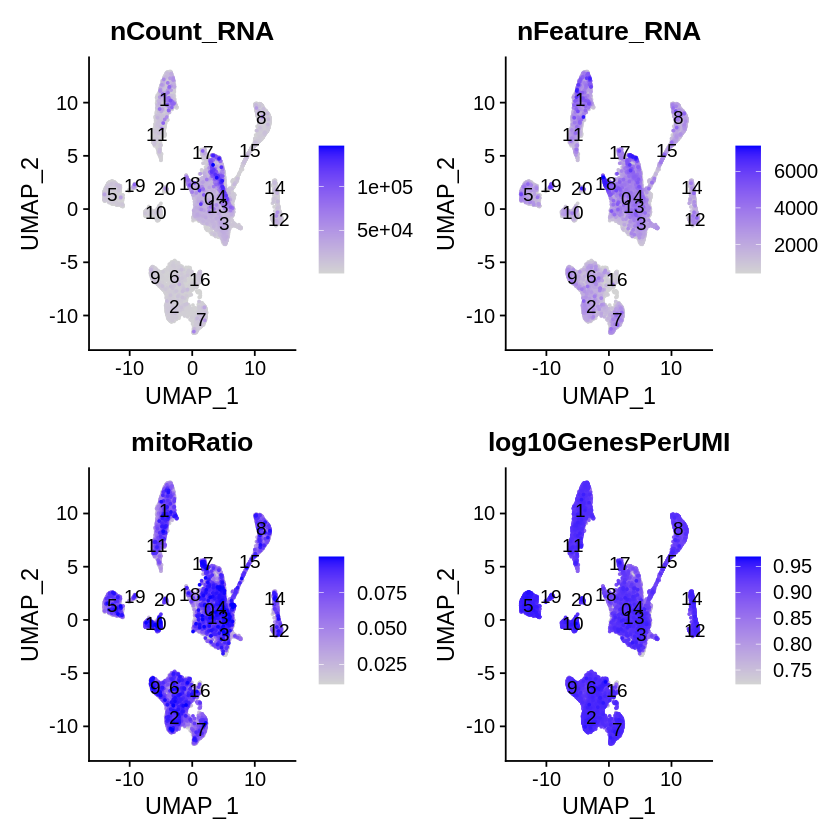

In [6]:
# explore if any cluster is seperated by unwanted variation
metric <- c('nCount_RNA','nFeature_RNA','mitoRatio','log10GenesPerUMI')
FeaturePlot(data,reduction='umap',
            features=metric,pt.size=0.4,
            sort.cell=TRUE,min.cutoff='q10',label=TRUE)

In [7]:
# see how PC (linear space) seperate the clusters/cell types
columns <- c(paste0("PC_", 1:16),
            'ident',
            'UMAP_1',
            'UMAP_2')

pc_data <- FetchData(data, vars=columns)

Warning message:
“The `guide` argument in `scale_*()` cannot be `FALSE`. This was deprecated in ggplot2 3.3.4.
ℹ Please use "none" instead.”


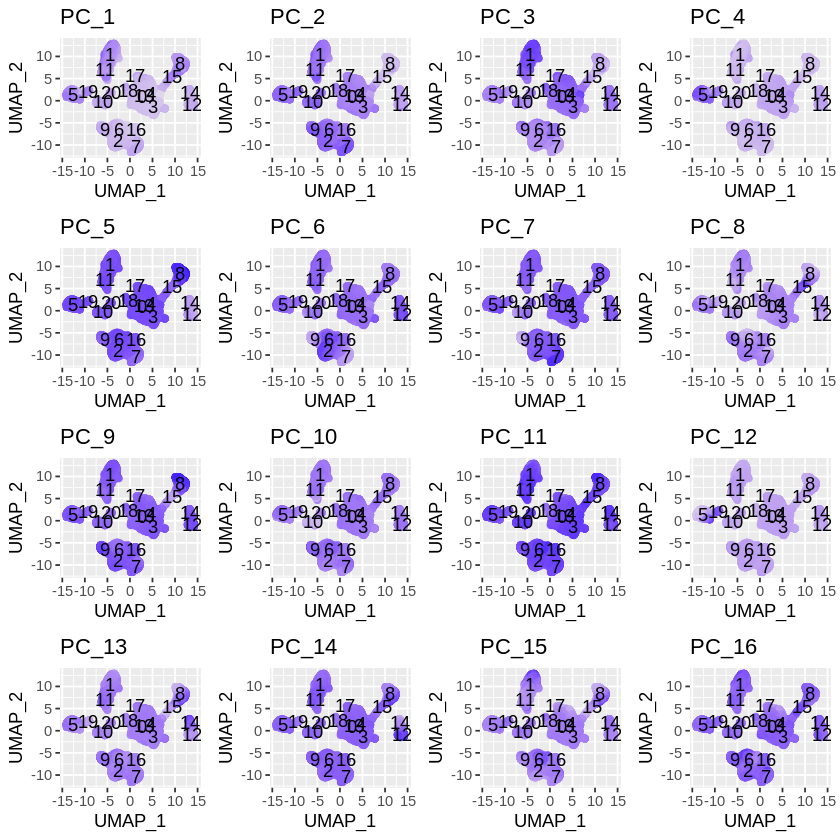

In [10]:
# this is resolution 0.5
umap_label <- FetchData(data, vars=c('ident',"UMAP_1","UMAP_2")) %>%
    group_by(ident) %>%
    summarise(x=mean(UMAP_1), y=mean(UMAP_2))
map(paste0("PC_",1:16), function(pc){
    ggplot(pc_data,
          aes(UMAP_1,UMAP_2)) +
            geom_point(aes_string(color=pc),
                      alpha=0.6) +
            scale_color_gradient(guide="none",
                                low='grey90',
                                high='blue') +
            geom_text(data=umap_label,
                     aes(label=ident,x,y)) +
            ggtitle(pc)
}) %>%
        plot_grid(plotlist = .)

In [29]:
genes <- read.table("Markers-Genes.Mouse.txt",sep="\t")[,1]

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
“The following requested variables were not found (10 out of 30 shown): Gata1, Mrgprx2, Nkx2-5, Nppa, Crp, Alb, Ins2, Gcg, Try10, Cpa1”
Warning message:
“Removed 1272 rows containing missing values (`geom_point()`).”


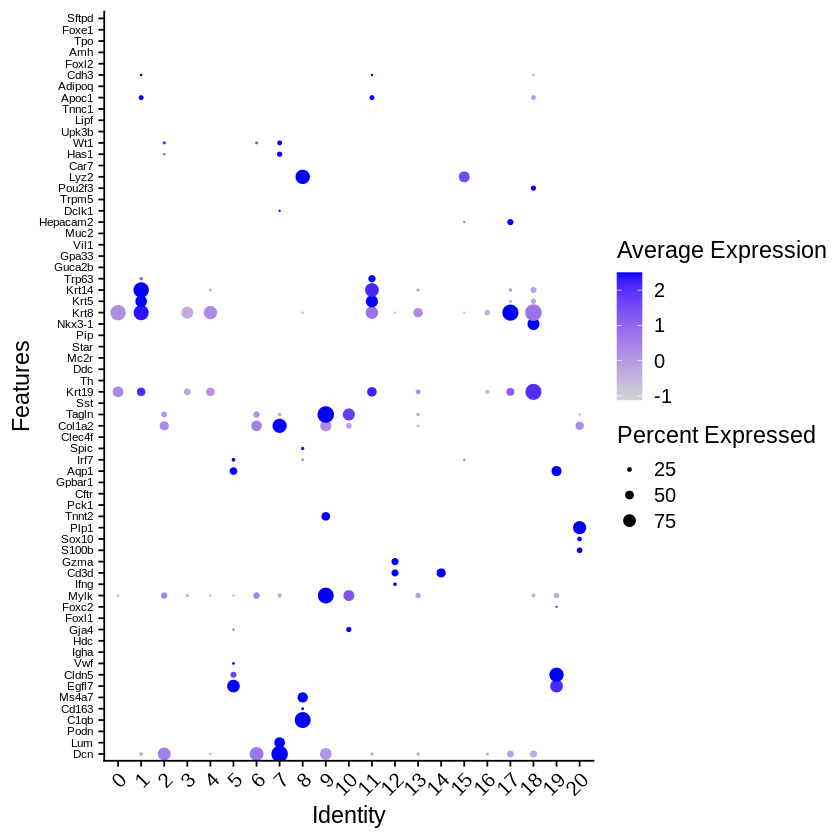

In [41]:
DotPlot(data,features=unique(genes),dot.scale=4,dot.min=0.1) + RotatedAxis() + coord_flip() +
theme(axis.text.y=element_text(size=7))

Warning message:
“The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality.”


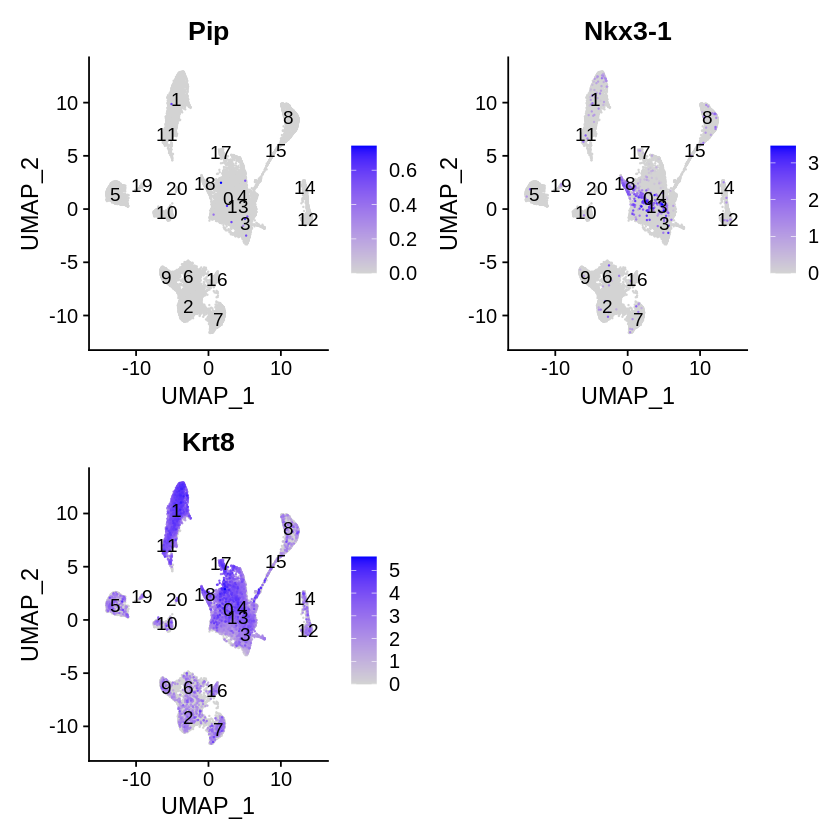

In [65]:
# Krt8+ clusters (excluding 1 and 11) 
    # Cluster 0 is indifferentiable from the top and middle master cluster
    # Cluster 0,3,4,13, similar to 0, event lower percents cell
    # Cluster 17, highest Krt8, different from 1 and 11, basal-, Dclk1+
    # Cluster 18, Nkx3-1+ luminal
FeaturePlot(data, reduction='umap',features=c('Pip','Nkx3-1','Krt8'),
           sort.cell = TRUE, label=TRUE)

Warning message:
“The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality.”


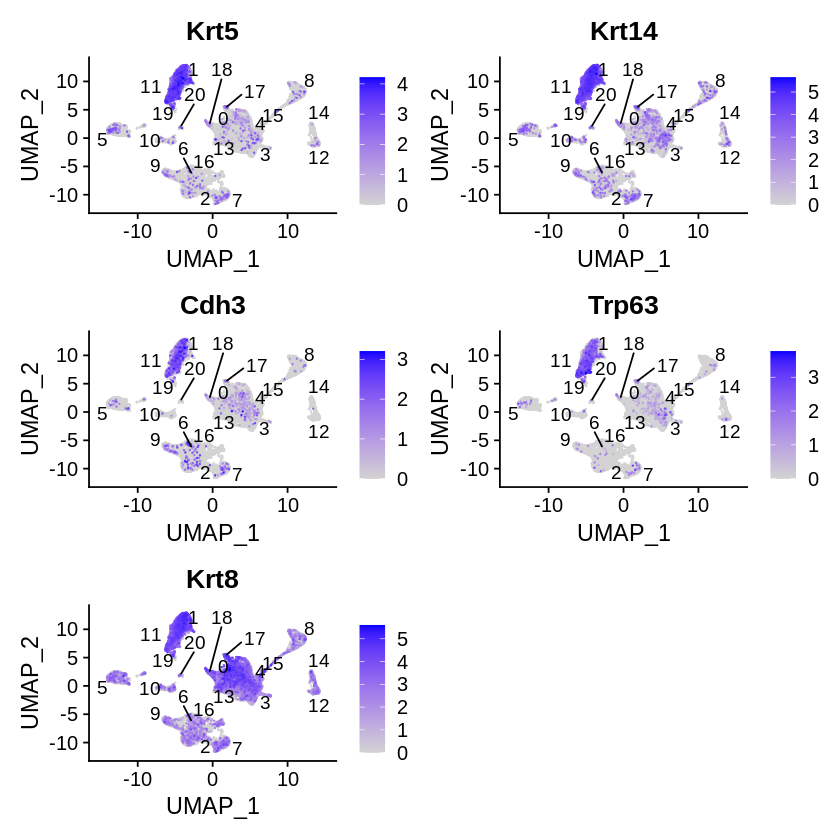

In [63]:
# Cluster 1 and 11 are very similar, strong signature of basal epithelial cell, all three
    # 11 has Trp63 (basal) slightly higher than 1
    # 1 has Krt8 (luminal) average expression higher than 11
    # also some sigature of luminal, fibroblast, myofibroblast
FeaturePlot(data, reduction='umap',features=c('Krt5','Krt14','Cdh3','Trp63','Krt8'),
           sort.cell = TRUE, label=TRUE,repel=TRUE)

Warning message:
“The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality.”
Warning message:
“The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality.”


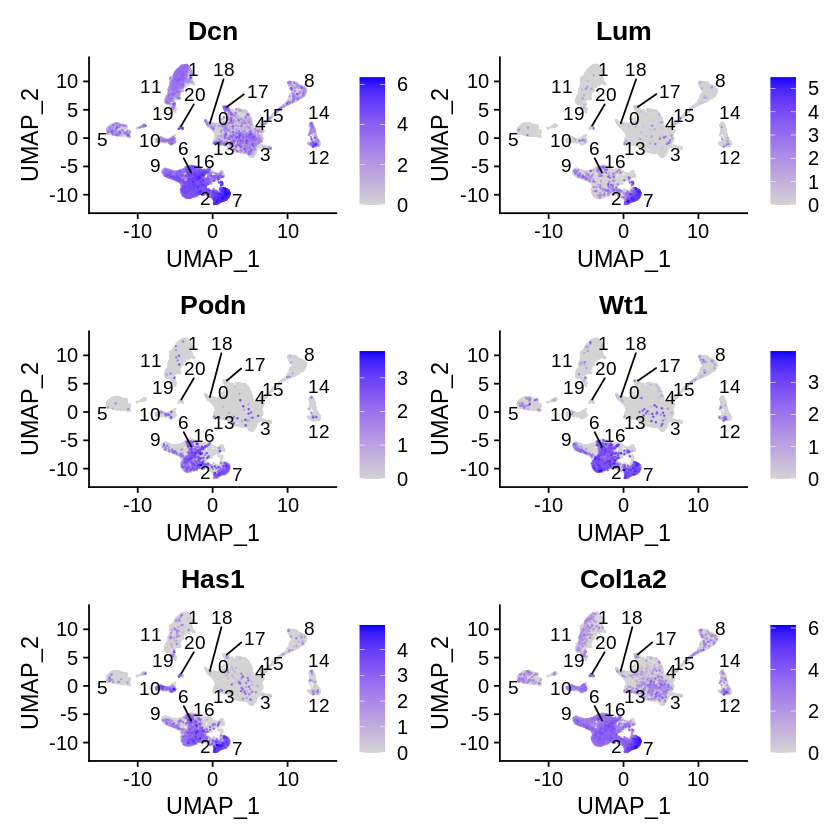

In [64]:
# Cluster 2,6,7,9,16, the bottom master cluster could be mesoderm layer
    ## cluster 2,6 has no strong everything, Lum-
        ### cluster 6 Has1-
    # Cluster 7: fibroblast, Lum+/Col1a2
    # Cluster 9: vascular smooth muscle cell or different types of fibroblast, Lum-/Tagln+
    # cluster 16: low everything, no fibroblast siganture, more like epithelial cell
p1 <- FeaturePlot(data, reduction='umap',features=c('Dcn','Lum','Podn','Wt1','Has1','Col1a2'),
           sort.cell = TRUE, label=TRUE,repel=TRUE)

p2 <- FeaturePlot(data, reduction='umap',features=c('Mylk','Tagln','Col1a2'),
           sort.cell = TRUE, label=TRUE,repel=TRUE)
p1

Warning message:
“The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality.”


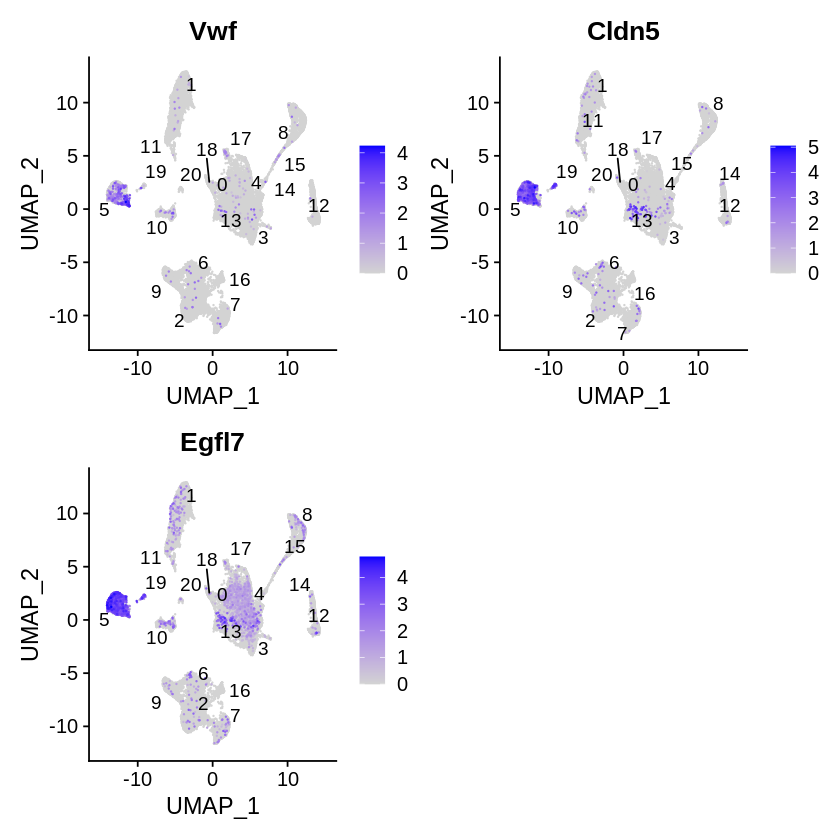

In [70]:
# cluster 5,19, endothelial cell
FeaturePlot(data, reduction='umap',features=c('Vwf','Cldn5','Egfl7'),
           sort.cell = TRUE, label=TRUE,repel=TRUE)

Warning message:
“The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality.”


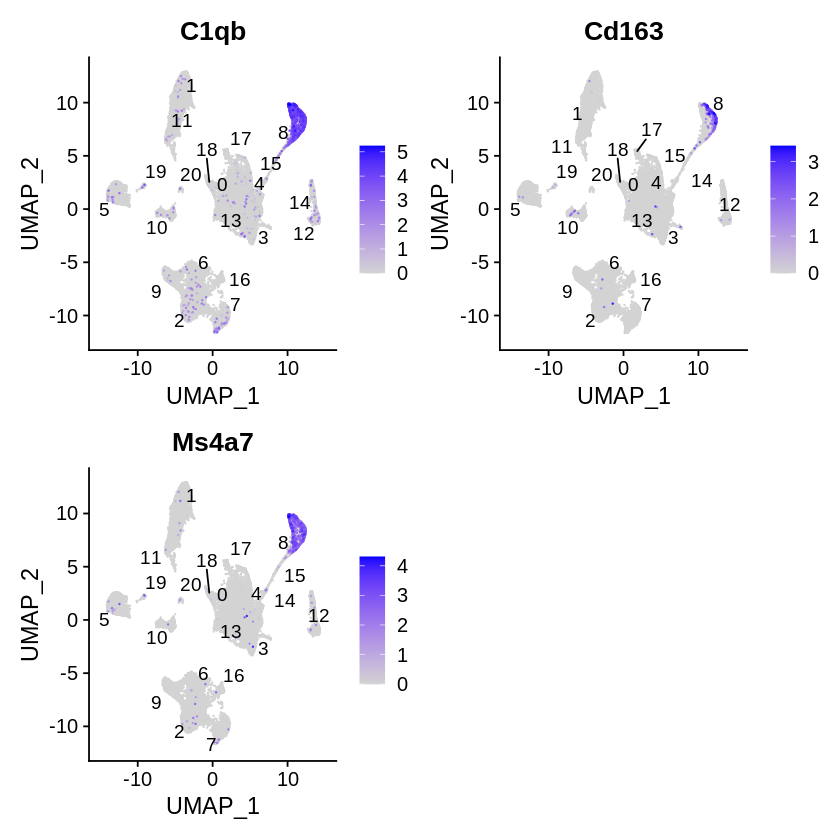

In [71]:
# cluster 8 Macrophage
FeaturePlot(data, reduction='umap',features=c('C1qb','Cd163','Ms4a7'),
           sort.cell = TRUE, label=TRUE,repel=TRUE)

Warning message:
“The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality.”


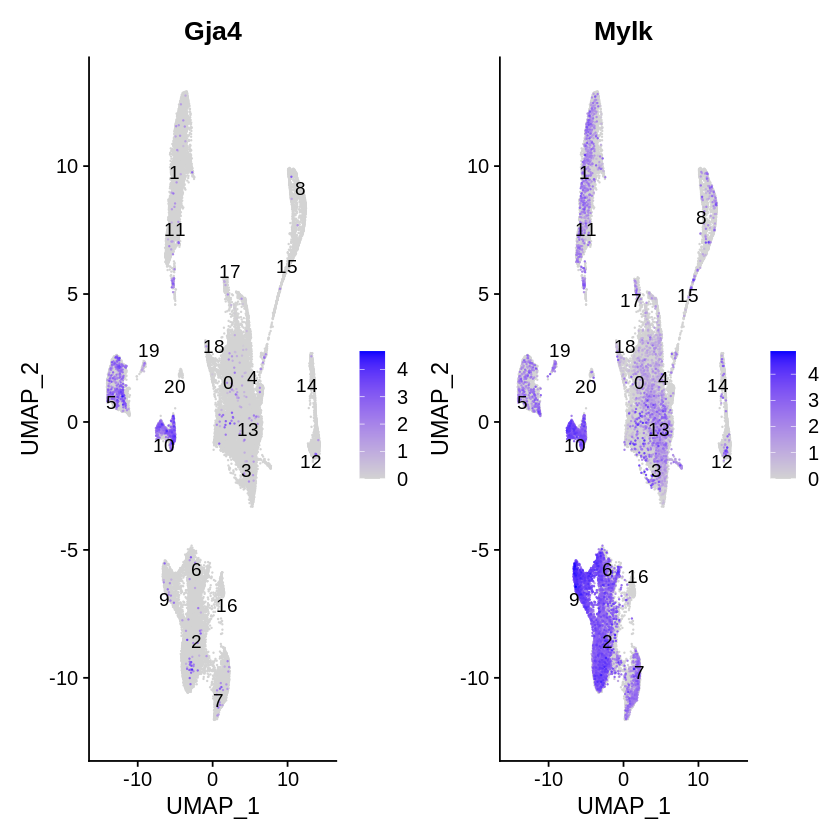

In [72]:
# cluster 10 Vascular Smooth muscle cell
FeaturePlot(data, reduction='umap',features=c('Gja4','Mylk'),
           sort.cell = TRUE, label=TRUE,repel=TRUE)

Warning message:
“The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality.”


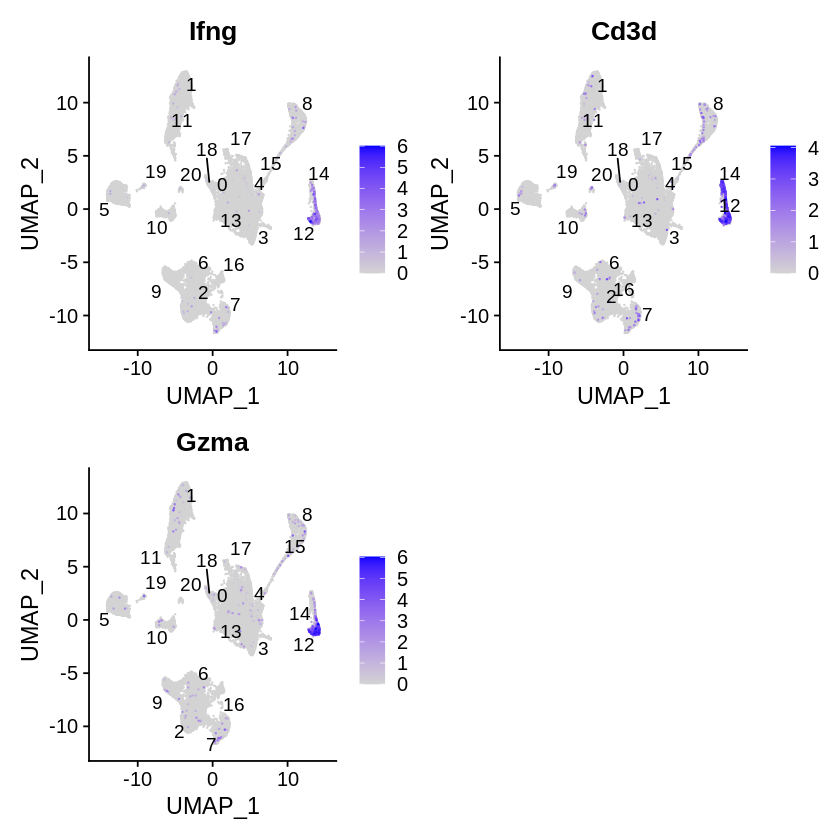

In [73]:
# cluster 12, 14: T cell
FeaturePlot(data, reduction='umap',features=c('Ifng','Cd3d','Gzma'),
           sort.cell = TRUE, label=TRUE,repel=TRUE)

Warning message:
“The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality.”


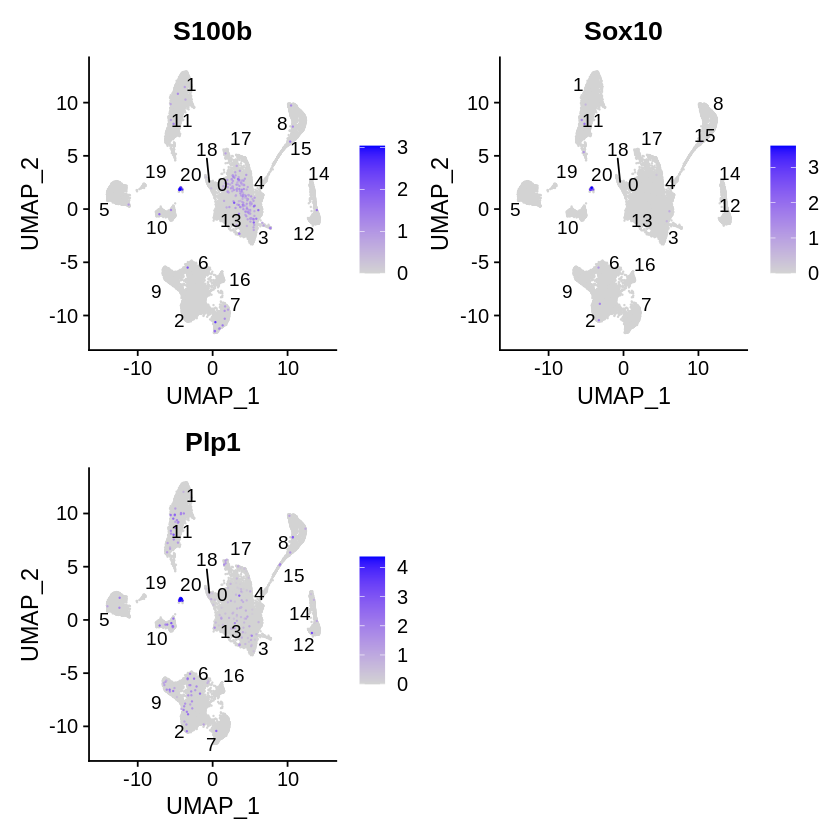

In [74]:
# cluster 20: Schwann cell
FeaturePlot(data, reduction='umap',features=c('S100b','Sox10','Plp1'),
           sort.cell = TRUE, label=TRUE,repel=TRUE)

In [8]:
annotations <- read.csv("mouse-gene-annotation.csv",sep="\t")

In [9]:
head(annotations)

,gene_id,gene_name,seq_name,gene_biotype,description
,<chr>,<chr>,<chr>,<chr>,<chr>
1,ENSMUSG00000102693,4933401J01Rik,1,TEC,RIKEN cDNA 4933401J01 gene [Source:MGI Symbol;Acc:MGI:1918292]
2,ENSMUSG00000064842,Gm26206,1,snRNA,"predicted gene, 26206 [Source:MGI Symbol;Acc:MGI:5455983]"
3,ENSMUSG00000051951,Xkr4,1,protein_coding,X-linked Kx blood group related 4 [Source:MGI Symbol;Acc:MGI:3528744]
4,ENSMUSG00000102851,Gm18956,1,processed_pseudogene,"predicted gene, 18956 [Source:MGI Symbol;Acc:MGI:5011141]"
5,ENSMUSG00000103377,Gm37180,1,TEC,"predicted gene, 37180 [Source:MGI Symbol;Acc:MGI:5610408]"
6,ENSMUSG00000104017,Gm37363,1,TEC,"predicted gene, 37363 [Source:MGI Symbol;Acc:MGI:5610591]"


In [200]:
# explore some known "basic" cell type markers
# all genes, not just variable genes
DefaultAssay(data) <- "RNA"

In [201]:
data

An object of class Seurat 
40261 features across 47804 samples within 3 assays 
Active assay: RNA (19601 features, 0 variable features)
 2 other assays present: SCT, integrated
 2 dimensional reductions calculated: pca, umap

In [202]:
# Pull out all "Marker Features", use find conserved features since we use integrated data
markers <-  FindAllMarkers(data, only.pos = TRUE, min.diff.pct = 0.25, min.pct = 0.25,
                           logfc.threshold = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20



In [203]:
out <- markers %>%
           rownames_to_column(var = "gene_name") %>%
           left_join(y = unique(annotations[, c("gene_name", "description")]),
           by = c("gene" = "gene_name")) %>%
          dplyr::arrange(p_val_adj)

In [204]:
saveRDS(out,file='AllMarkers.rds')

In [118]:
top10 <- out %>%
        group_by(cluster) %>%
        top_n(n=10,wt=avg_log2FC)

In [190]:
top10[top10$cluster==15,]

gene_name,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,description
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
148,0,2.207447,0.958,0.103,0,15,Cd74,"CD74 antigen (invariant polypeptide of major histocompatibility complex, class II antigen-associated) [Source:MGI Symbol;Acc:MGI:96534]"
149,0,2.063523,0.933,0.078,0,15,H2-Ab1,"histocompatibility 2, class II antigen A, beta 1 [Source:MGI Symbol;Acc:MGI:103070]"
150,0,2.047262,0.917,0.068,0,15,H2-Aa,"histocompatibility 2, class II antigen A, alpha [Source:MGI Symbol;Acc:MGI:95895]"
151,0,1.652369,0.725,0.027,0,15,Il1b,interleukin 1 beta [Source:MGI Symbol;Acc:MGI:96543]
152,0,1.481761,0.851,0.054,0,15,Tyrobp,TYRO protein tyrosine kinase binding protein [Source:MGI Symbol;Acc:MGI:1277211]
153,0,1.418265,0.917,0.194,0,15,Srgn,serglycin [Source:MGI Symbol;Acc:MGI:97756]
154,0,1.318968,0.725,0.038,0,15,Cytip,cytohesin 1 interacting protein [Source:MGI Symbol;Acc:MGI:2183535]
155,0,1.295809,0.742,0.043,0,15,Cd83,CD83 antigen [Source:MGI Symbol;Acc:MGI:1328316]
156,0,1.288385,0.768,0.071,0,15,Lsp1,lymphocyte specific 1 [Source:MGI Symbol;Acc:MGI:96832]


In [128]:
top10[top10$cluster==11,]

gene_name,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,description
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
111,0,1.3984894,0.765,0.094,0,11,1600014C10Rik,RIKEN cDNA 1600014C10 gene [Source:MGI Symbol;Acc:MGI:1919494]
112,0,1.3409936,0.869,0.158,0,11,Fxyd3,FXYD domain-containing ion transport regulator 3 [Source:MGI Symbol;Acc:MGI:107497]
113,0,1.2486379,0.670,0.099,0,11,Krt15,keratin 15 [Source:MGI Symbol;Acc:MGI:96689]
114,0,1.2461092,0.810,0.162,0,11,Krt14,keratin 14 [Source:MGI Symbol;Acc:MGI:96688]
115,0,1.2171784,0.995,0.500,0,11,Apoe,apolipoprotein E [Source:MGI Symbol;Acc:MGI:88057]
116,0,1.1310901,0.709,0.113,0,11,Krt5,keratin 5 [Source:MGI Symbol;Acc:MGI:96702]
117,0,1.1292062,0.724,0.131,0,11,Defb1,defensin beta 1 [Source:MGI Symbol;Acc:MGI:1096878]
118,0,1.1008901,0.856,0.341,0,11,Lcn2,lipocalin 2 [Source:MGI Symbol;Acc:MGI:96757]
119,0,1.0690570,0.816,0.231,0,11,Sfn,stratifin [Source:MGI Symbol;Acc:MGI:1891831]


Warning message:
“The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality.”


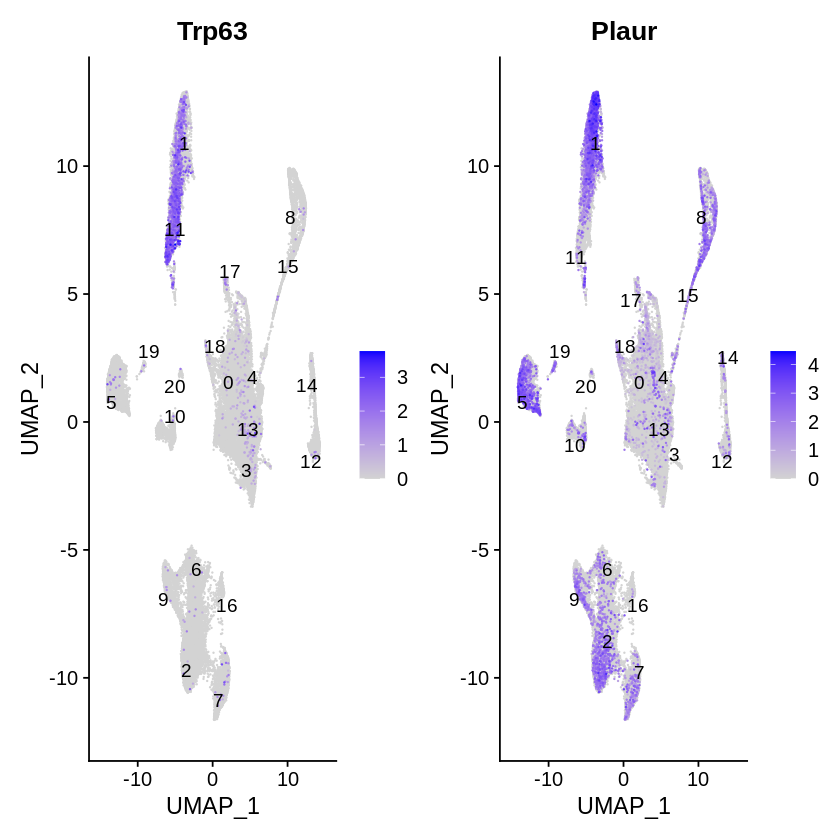

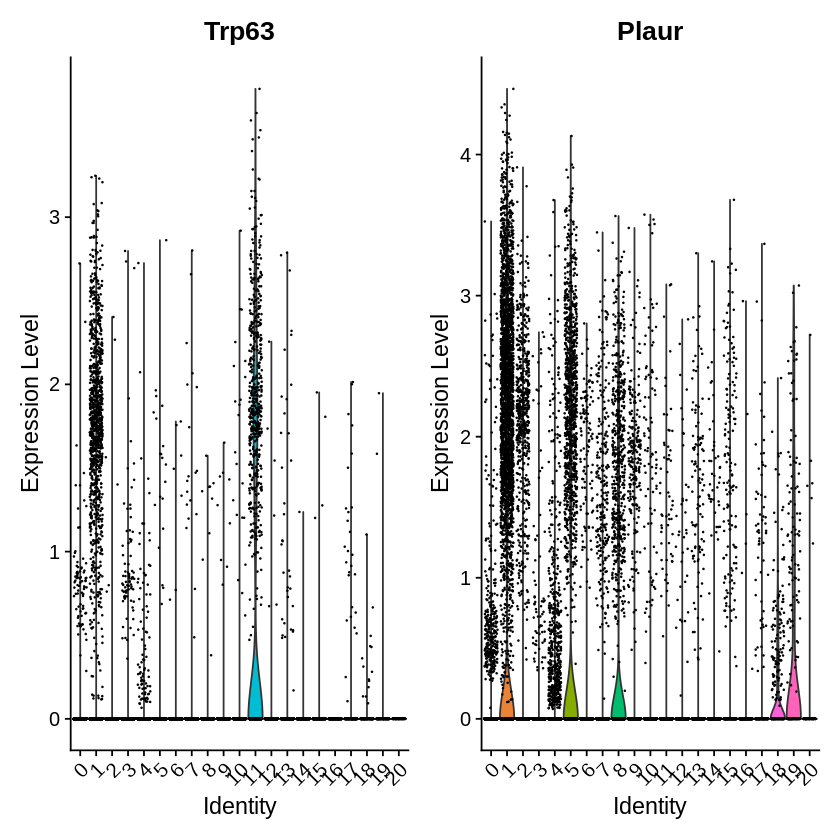

In [146]:
# differentiating cluster 1 and 11
DefaultAssay(data) <- "RNA"
features <- c("Trp63",'Plaur')
 
FeaturePlot(data, 
            reduction = "umap", 
            features = features,
            label = TRUE, 
            sort.cell = TRUE,
            repel = TRUE)
VlnPlot(object = data, 
        features = features)

In [144]:
# Determine differentiating markers for basal epithelial cell
basal <- FindMarkers(data,
                          ident.1 = 1,
                          ident.2 = 11)                 

# Add gene symbols to the DE table
basal <- basal %>%
  rownames_to_column(var = "gene") %>%
  left_join(y = unique(annotations[, c("gene_name", "description")]),
             by = c("gene" = "gene_name")) %>%
  dplyr::arrange(avg_log2FC) 

# View data
View(basal)

gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,description
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Fos,0.000000e+00,-1.2235732,0.403,0.919,0.000000e+00,FBJ osteosarcoma oncogene [Source:MGI Symbol;Acc:MGI:95574]
Txnip,0.000000e+00,-1.0196872,0.221,0.727,0.000000e+00,thioredoxin interacting protein [Source:MGI Symbol;Acc:MGI:1889549]
Ier2,5.013816e-304,-0.8748788,0.407,0.821,9.827581e-300,immediate early response 2 [Source:MGI Symbol;Acc:MGI:104815]
Egr1,0.000000e+00,-0.8646645,0.522,0.921,0.000000e+00,early growth response 1 [Source:MGI Symbol;Acc:MGI:95295]
Socs3,3.045994e-235,-0.8505113,0.210,0.614,5.970453e-231,suppressor of cytokine signaling 3 [Source:MGI Symbol;Acc:MGI:1201791]
Klf2,1.248163e-190,-0.7862911,0.143,0.480,2.446525e-186,Kruppel-like factor 2 (lung) [Source:MGI Symbol;Acc:MGI:1342772]
Btg2,0.000000e+00,-0.7753762,0.588,0.935,0.000000e+00,BTG anti-proliferation factor 2 [Source:MGI Symbol;Acc:MGI:108384]
Irf1,3.573599e-191,-0.7545050,0.185,0.542,7.004612e-187,interferon regulatory factor 1 [Source:MGI Symbol;Acc:MGI:96590]
Dusp1,1.011013e-136,-0.6270236,0.347,0.651,1.981687e-132,dual specificity phosphatase 1 [Source:MGI Symbol;Acc:MGI:105120]


In [148]:
# make a tentative UMAP
data <- RenameIdents(object = data,
                                 "0"="Secretory.1",
                                 "3"="Secretory.2",       
                                 "4"="Secretory.3",
                                 "13"="Secretory.4",
                                 "17"="Secretory.5",
                                 "18"="Secretory.6",
                                 "1"="Basal Epithelial Cell.1",
                                 "11"="Basal Epithelial Cell.2",
                                 "2"="mesoderm.1",
                                 "6"="mesoderm.2",
                                 "7"="mesoderm.3:Fibroblast",
                                 "9"="mesoderm.4:Fibroblast(Lum-)",
                                 "16"="mesoderm.5:Epithelial",
                                 "5"="Endothelial.1",
                                 "19"="Endothelial.2",
                                 "8"="Macrophage",
                                 "10"="Vascular smooth muscle cell",
                                 "12"="T cell(Gzma+)",
                                 "14"="T cell(Gzma-)",
                                 "20"="Schwann cell")

ERROR: Error in RenameIdents.Seurat(object = data, `0` = "Secretory.1", `3` = "Secretory.2", : Cannot find any of the provided identities


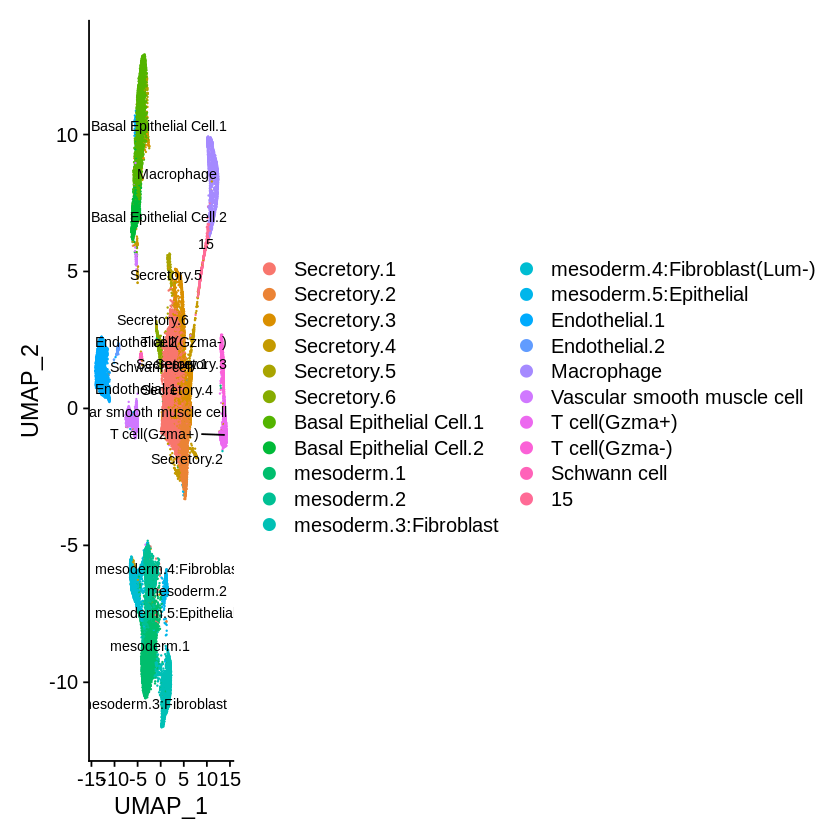

In [149]:
# Plot the UMAP
DimPlot(object = data, 
        reduction = "umap", 
        label = TRUE,
        label.size = 3,
        repel = TRUE)

In [159]:
palette <- c("Unknown"="#a9a9a9",
             "Secretory.1" = "#344B79",
             "Secretory.2" = "#344B79",       
             "Secretory.3" = "#344B79",
             "Secretory.4" = "#344B79",
             "Secretory.5" = "#344B79",
             "Secretory.6" = "#344B79",
             "Basal Epithelial Cell.1" = "#7c9ee3",
             "Basal Epithelial Cell.2" = "#7c9ee3",
             "mesoderm.1" = "#f03287",
             "mesoderm.2" = "#f03287",
             "mesoderm.3:Fibroblast" = "#f03287",
             "mesoderm.4:Fibroblast(Lum-)" = "#f03287",
             "mesoderm.5:Epithelial" = "#f03287",
             "Endothelial.1" = "#7cd2e3",
             "Endothelial.2" = "#7cd2e3",
             "Macrophage" = "#F06B5F",
             "Vascular smooth muscle cell" = "#4D4031",
             "T cell(Gzma+)" = "#671F18",
             "T cell(Gzma-)" = "#671F18",
             "Schwann cell" = "#8AD293")

In [180]:
p <- Embeddings(object=data,reduction="umap")
labels <- data.frame(table(Idents(data)))
names(labels) <- c("cellType","count")

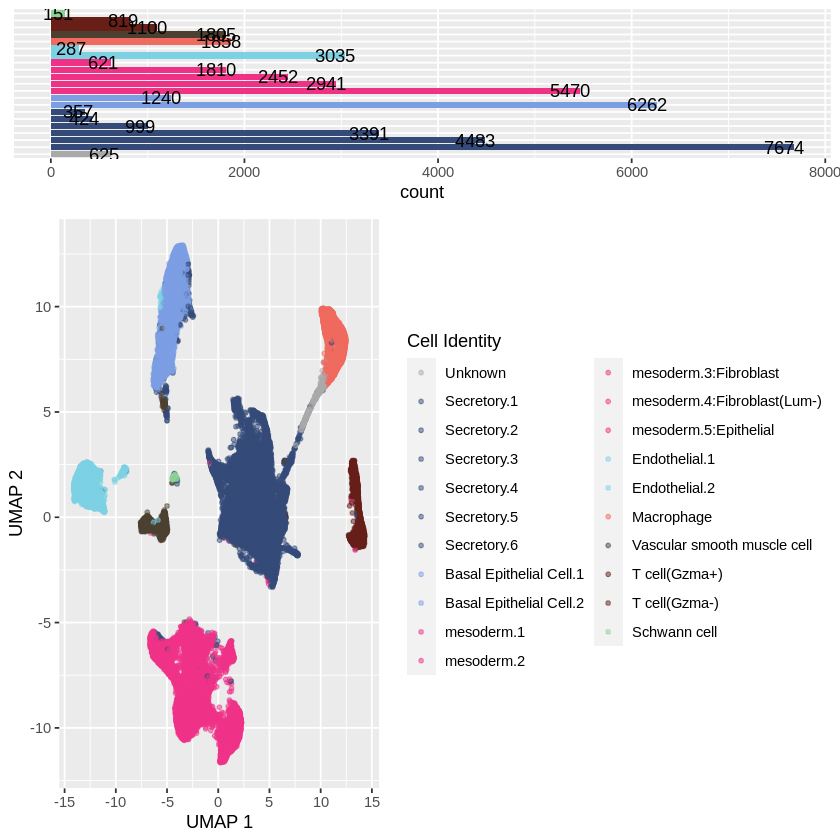

In [188]:
library(gridExtra)
barplot <- ggplot(data=labels,aes(x=cellType,y=count,fill=cellType))+
           geom_bar(stat="identity")+
           scale_fill_manual(values=palette)+
           geom_text(aes(label=count),vjust=0.5,hjust=0.75)+
           theme(axis.title.y=element_blank(),axis.text.y=element_blank(),axis.ticks.y=element_blank())+
           theme(legend.position="none")+
           coord_flip()
umap <- ggplot(data.frame(p),aes(x=UMAP_1, y=UMAP_2, color=Idents(data)))+
        geom_point(size=1,alpha=0.5)+
        scale_color_manual(name="Cell Identity",values=palette)+
        xlab("UMAP 1")+
        ylab("UMAP 2")
grid.arrange(barplot,umap,ncol=1,nrow=2,heights=c(1,3))

In [189]:
output <- "SeuratOut/integrated-allcomplexity-labeled.rds"
saveRDS(data,file=output)